 # Image compression by SVD
(1) We take an image

(2) we convert it in gray scale if necessary

(3) We construct the matrix of pixels, let it be 

(4) We compute the SVD of the matrix, of rank r 

(5) We choose k<=r

(6) We construct the Low Rank (k) approximation of image_marix

(7) We reconstruct the image


In [1]:
import os
import numpy as np
from PIL import Image
# pip install pillow
import matplotlib.pyplot as plt
%matplotlib inline

Size of the image:  (512, 512)  Total:  262144


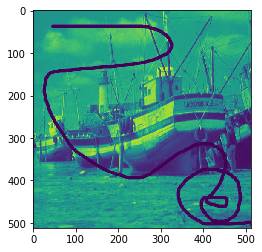

In [5]:
# impath = path to the image file 
impath = 'myboat.jpg' 
# Let us open the image
img = Image.open(impath)
print("Size of the image: ",img.size, " Total: ", 512*512)
plt.imshow(img)

(262144,)
(512, 512)


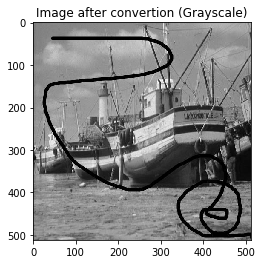

In [17]:
# convert image to gray scale 
imggray = img.convert('LA') # return <PIL.Image.Image image mode=LA size=512x512 at 0xC961FF0> we most to get data from it
imgmat = np.array( list(imggray.getdata(band = 0)), float) # we must transform output of getdata to list  
print(imgmat.shape) # number of pixel 
imgmat = imgmat.reshape(imggray.size[1], imggray.size[0]) #
print(imgmat.shape) # after reshape it 
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after convertion (Grayscale)")
plt.show()

In [19]:
# know the image matrix charactaristic 
rank = np.linalg.matrix_rank(imgmat)
n, m = imgmat.shape
print("n = ", n)
print("---------------------------------------------")
print("m = ", m)
print("---------------------------------------------")
print("rank = ", rank)

n =  512
---------------------------------------------
m =  512
---------------------------------------------
rank =  512


In [29]:
# apply svd for the image 
U, s, VT = np.linalg.svd(imgmat,full_matrices=True)
S = np.diag(s)
print("U shape is : ", U.shape)
print("s shape is : ", S.shape)
print("VT shape is : ", VT.shape)

U shape is :  (512, 512)
s shape is :  (512, 512)
VT shape is :  (512, 512)


we notice that shapes is ok, we didn't need to edit them

In [30]:
# construct the Low Rank (k) approximation of A: A_k
# reconstruct the image
def image_approximate(k):
    U_dash = U[:,:k]
    S_dash = S[:k,:k]
    VT_dash = VT[:k,:]
    return U_dash @ S_dash @ VT_dash

In [35]:
# show image
def show_image(k, img_mat):
    plt.figure()
    plt.imshow(img_mat,cmap = 'gray')
    title = f" Image after =  {k}" 
    plt.title(title)
    plt.show()

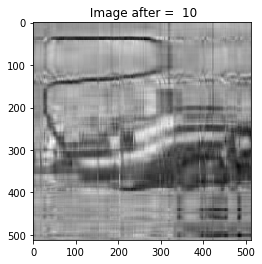

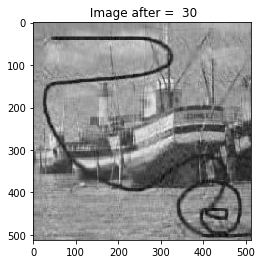

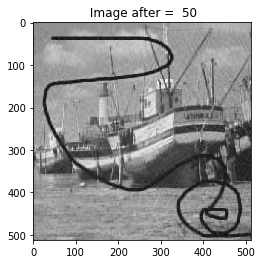

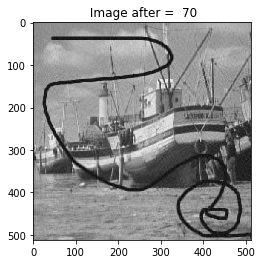

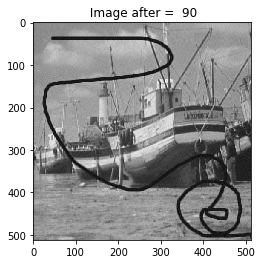

In [36]:
# try k from 10 ===> 100
for k in range(10,101,20):
    img_mat = image_approximate(k)
    show_image(k, img_mat)

 # Image compression by PCA
(1) take an image

(2) convert it in gray scale if necessary

(3) construct the matrix of pixels

(4) standarize th image matrix

(4) compute the covarance matrix of the standarized image matrix

(5) compute eigen values and eigen vector for the covariance matrix

(5) We choose k(number of eigen vectors)<=rank 

(6) We construct the Low Rank (k) approximation of image matrix

(7) We reconstruct the image


Size of the image:  (512, 512)  Total:  262144


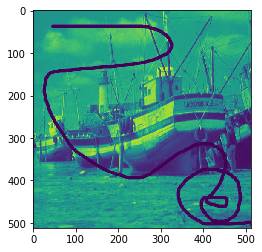

In [37]:
# impath = path to the image file 
impath = 'myboat.jpg' 
# Let us open the image
img = Image.open(impath)
print("Size of the image: ",img.size, " Total: ", 512*512)
plt.imshow(img)

(262144,)
(512, 512)


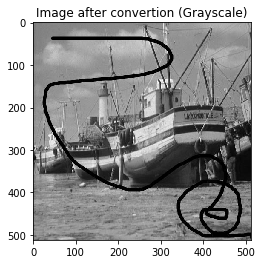

In [38]:
# convert image to gray scale 
imggray = img.convert('LA') # return <PIL.Image.Image image mode=LA size=512x512 at 0xC961FF0> we most to get data from it
imgmat = np.array( list(imggray.getdata(band = 0)), float) # we must transform output of getdata to list  
print(imgmat.shape) # number of pixel 
imgmat = imgmat.reshape(imggray.size[1], imggray.size[0]) #
print(imgmat.shape) # after reshape it 
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after convertion (Grayscale)")
plt.show()

In [45]:
# standarize th image matrix
mean = np.mean(imgmat, axis=0).reshape(1,imgmat.shape[1])
std = np.std(imgmat, axis = 0,ddof =1).reshape(1,imgmat.shape[1])
std_image_matrix = (imgmat - mean)/std

In [48]:
# get covariance matrix 
N = imgmat.shape[0] # number of samples
C = (std_image_matrix.T @ std_image_matrix)/(N-1)

In [51]:
#compute eigen values and eigen vector for the covariance matrix
egenValues, eigenVectors = np.linalg.eig(C)

(512, 512)

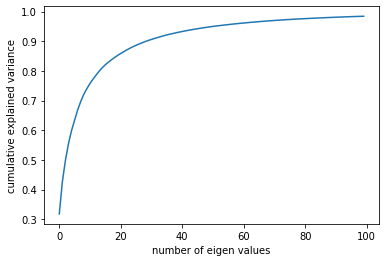

In [58]:
# calculate percentage which each eigen values contribute in calculating image matrix 
lamda_sum = np.sum(egenValues)
Percentage_of_variance = egenValues / lamda_sum
plt.plot(np.cumsum(Percentage_of_variance[:100])) # cumsum express how variance gose to 1 if we combine n from eigen values 
plt.xlabel('number of eigen values')
plt.ylabel('cumulative explained variance');

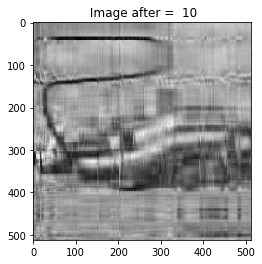

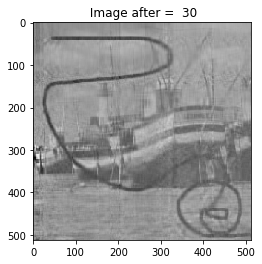

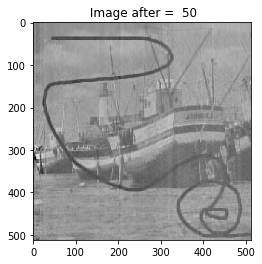

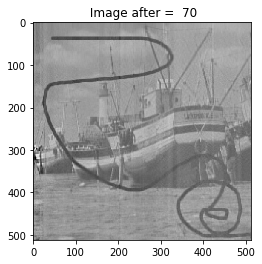

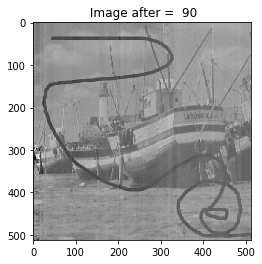

In [75]:
#choose k(number of eigen vectors)<=rank
#construct the Low Rank (k) approximation of image matrix
# reconstruct the image
# try k from 10 ===> 100
for k in range(10,101,20):
    new_eigen_vectors = eigenVectors[:,:k]
    approximate_image = (std_image_matrix @ new_eigen_vectors)
    show_image(k, approximate_image @ new_eigen_vectors.T)

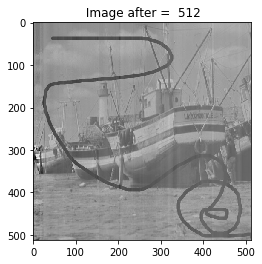

In [77]:
new_eigen_vectors = eigenVectors[:,:512]
approximate_image = (std_image_matrix @ new_eigen_vectors)
show_image(512, approximate_image @ new_eigen_vectors.T)

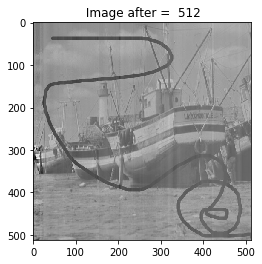

In [78]:
show_image(512, std_image_matrix)